In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Clean import *

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [3]:
RUOA = "../../Datasets/"
DOWNTOWN = "../AltenativeDatasets/Datasets/"

In [4]:
df_ruoa = pd.read_csv(RUOA + "Day.csv")
df_downtown = pd.read_csv(DOWNTOWN + "CompleteDataset.csv")

In [5]:
df_ruoa["Time"] = pd.to_datetime(df_ruoa["Time"])
df_downtown["Fecha"] = pd.to_datetime(df_downtown["Fecha"])

In [6]:
print(f"RUOA: {df_ruoa.Time.min()}, {df_ruoa.Time.max()}")

RUOA: 2015-08-01 00:00:00, 2025-01-27 00:00:00


In [7]:
df_downtown = df_downtown.rename({"Fecha":"Time", 
                    "Temperatura": "TemperatureDowntown",
                    "RelativeHumidity": "RelativeHumidityDowntown",
                    "SolarRadiation": "SolarRadiationDowntown",
                    "Rainfall":"RainfallDowntown",
                    "WindDirection": "WindDirectionDowntown",
                    "PM10": "PM10Downtown",
                    "PM2.5": "PM2.5Downtown",
                    "O3": "O3Downtown",
                    "CO": "CODowntown",
                    "NO": "NODowntown",
                    "NO2": "NO2Downtown",
                    "SO2": "SO2Downtown",
                    }, axis=1)

In [8]:
df_downtown.columns

Index(['Time', 'TemperatureDowntown', 'RelativeHumidityDowntown',
       'SolarRadiationDowntown', 'RainfallDowntown', 'WindDirectionDowntown',
       'PM10Downtown', 'PM2.5Downtown', 'O3Downtown', 'CODowntown',
       'NODowntown', 'NO2Downtown', 'SO2Downtown'],
      dtype='object')

In [9]:
df_merge = pd.merge(df_ruoa, df_downtown, how="outer", on=["Time", "Time"]).drop_duplicates()
df_merge

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,TemperatureDowntown,RelativeHumidityDowntown,SolarRadiationDowntown,RainfallDowntown,WindDirectionDowntown,PM10Downtown,PM2.5Downtown,O3Downtown,CODowntown,NODowntown,NO2Downtown,SO2Downtown
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,2025-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.816667,31.000000,0.0,0.0,194.0,-14.0,21.625000,0.0,NaN,0.0,0.0,0.0
3505,2025-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.087500,29.666667,0.0,0.0,223.0,-14.0,19.250000,0.0,NaN,0.0,0.0,0.0
3506,2025-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.862500,31.500000,0.0,0.0,209.0,-14.0,18.250000,0.0,NaN,0.0,0.0,0.0
3507,2025-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.237500,33.458333,0.0,0.0,145.0,-14.0,20.833333,0.0,NaN,0.0,0.0,0.0


In [10]:
print(f"RUOA: {df_merge.Time.min()}, {df_merge.Time.max()}")

RUOA: 2015-08-01 00:00:00, 2025-03-09 00:00:00


## Temperature

In [14]:
df_merge[["Temp_Avg", "TemperatureDowntown"]].describe()

,Temp_Avg,TemperatureDowntown
count,3242.000000,2341.000000
mean,17.600482,19.527246
std,2.691010,2.495301
min,7.102895,8.590000
25%,15.833456,18.104167
50%,17.731101,19.545833
75%,19.252424,21.066667
max,32.322439,26.829167


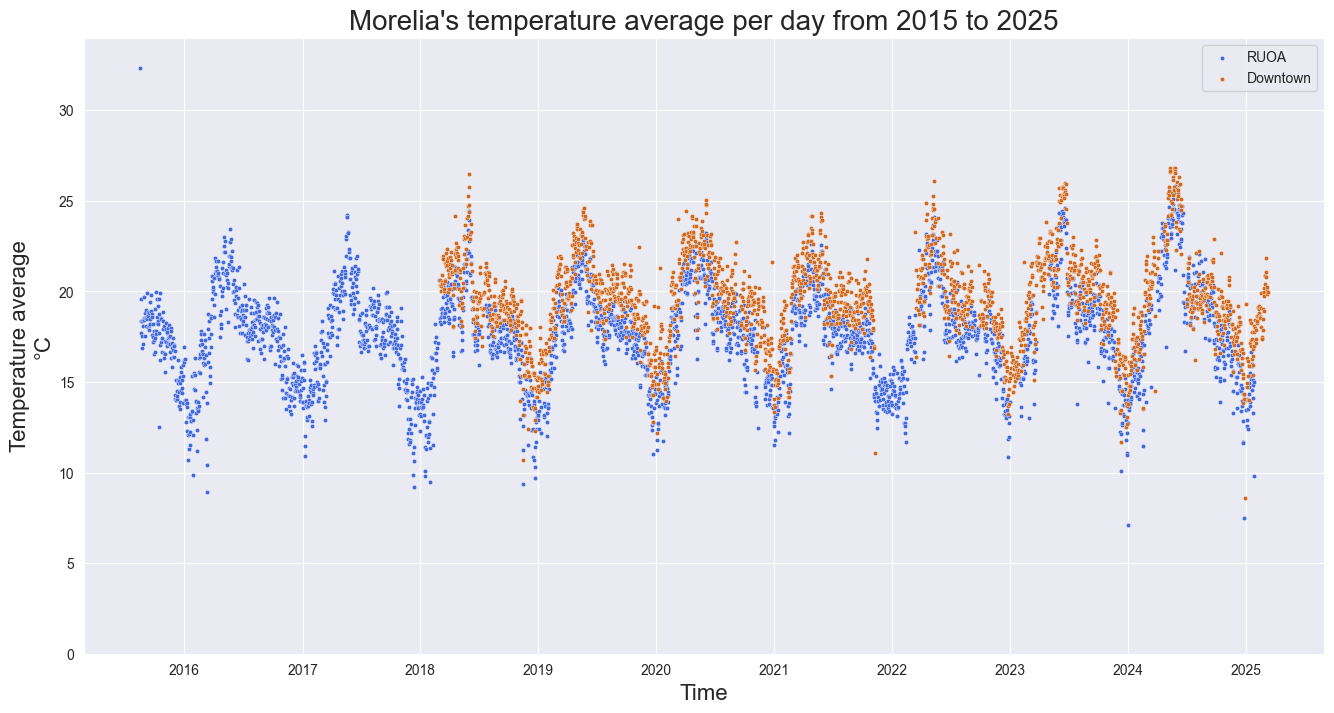

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Temp_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["TemperatureDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 34)
plt.ylabel("Temperature average\n°C", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's temperature average per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Rainfall

In [18]:
df_merge["Rain_Tot"] = df_merge["Rain_Tot"].apply(rainfall)

In [19]:
df_merge["RainfallDowntown"] = df_merge["RainfallDowntown"].apply(rainfall)

In [20]:
df_merge[["Rain_Tot", "RainfallDowntown"]].describe()

,Rain_Tot,RainfallDowntown
count,3453.000000,1399.000000
mean,1.959340,84.700071
std,5.383117,165.600423
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.110000
75%,0.600000,1.025000
max,53.900000,431.980000


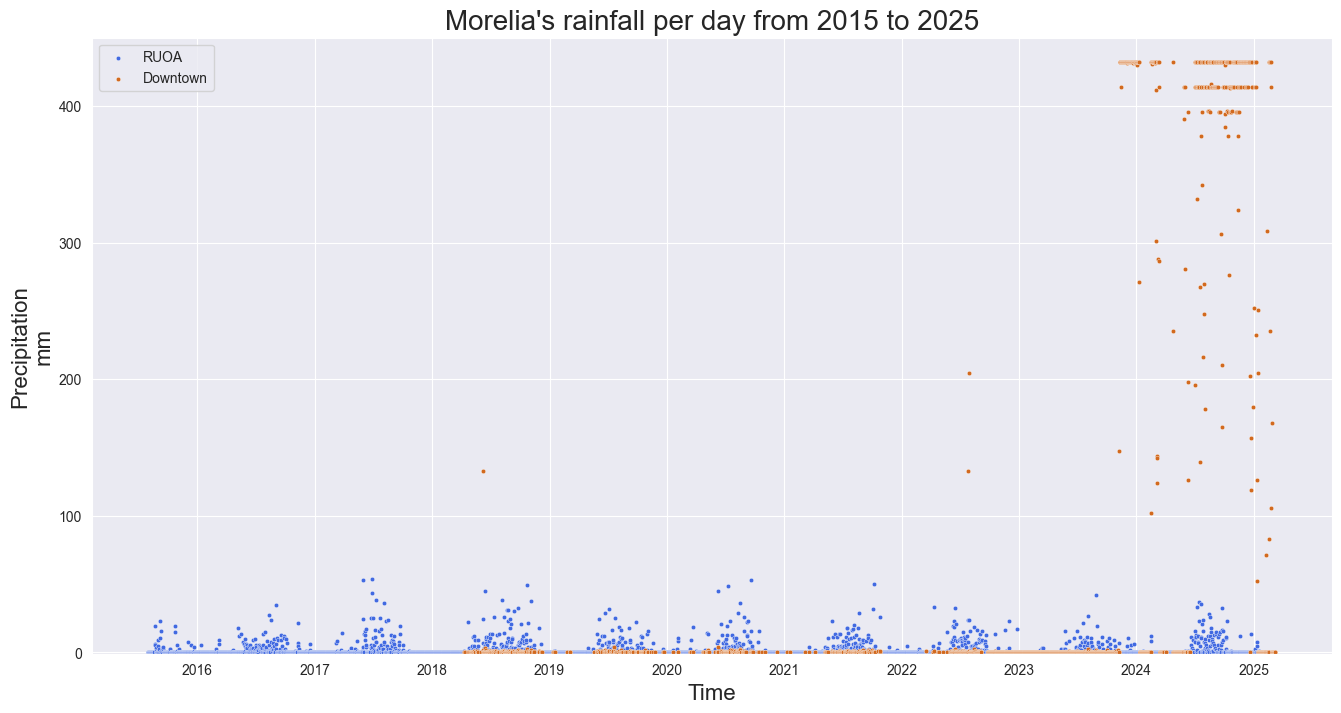

In [23]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rain_Tot"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RainfallDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(-1, 450)
plt.ylabel("Precipitation\nmm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's rainfall per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

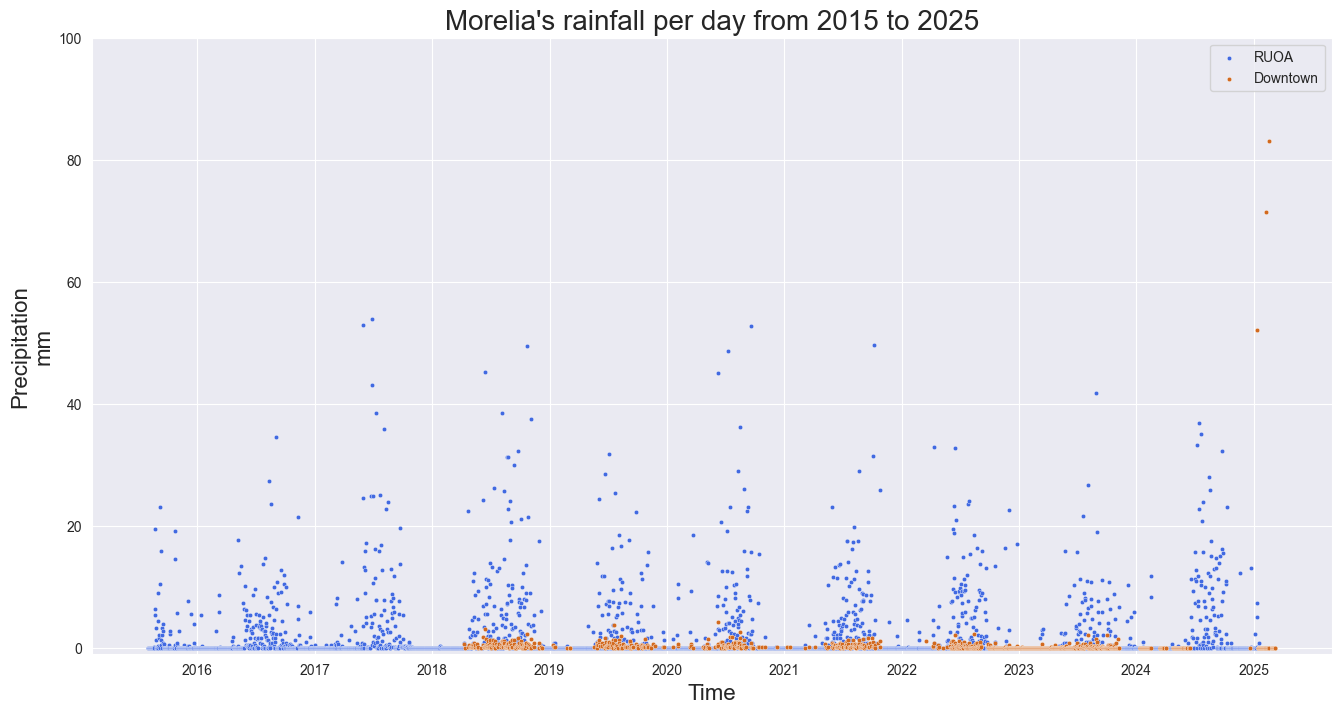

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rain_Tot"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RainfallDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(-1, 100)
plt.ylabel("Precipitation\nmm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's rainfall per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Relative Humidity

In [25]:
df_merge["RH_Avg"] = df_merge["RH_Avg"].apply(relativeHumidity)
df_merge["RelativeHumidityDowntown"] = df_merge["RelativeHumidityDowntown"].apply(relativeHumidity)

In [26]:
df_merge[["RH_Avg", "RelativeHumidityDowntown"]].describe()

,RH_Avg,RelativeHumidityDowntown
count,3265.000000,2341.000000
mean,61.178079,53.747995
std,16.665208,14.508262
min,0.408878,15.416667
25%,49.597813,42.500000
50%,64.785764,56.782609
75%,74.459132,65.541667
max,98.498681,88.375000


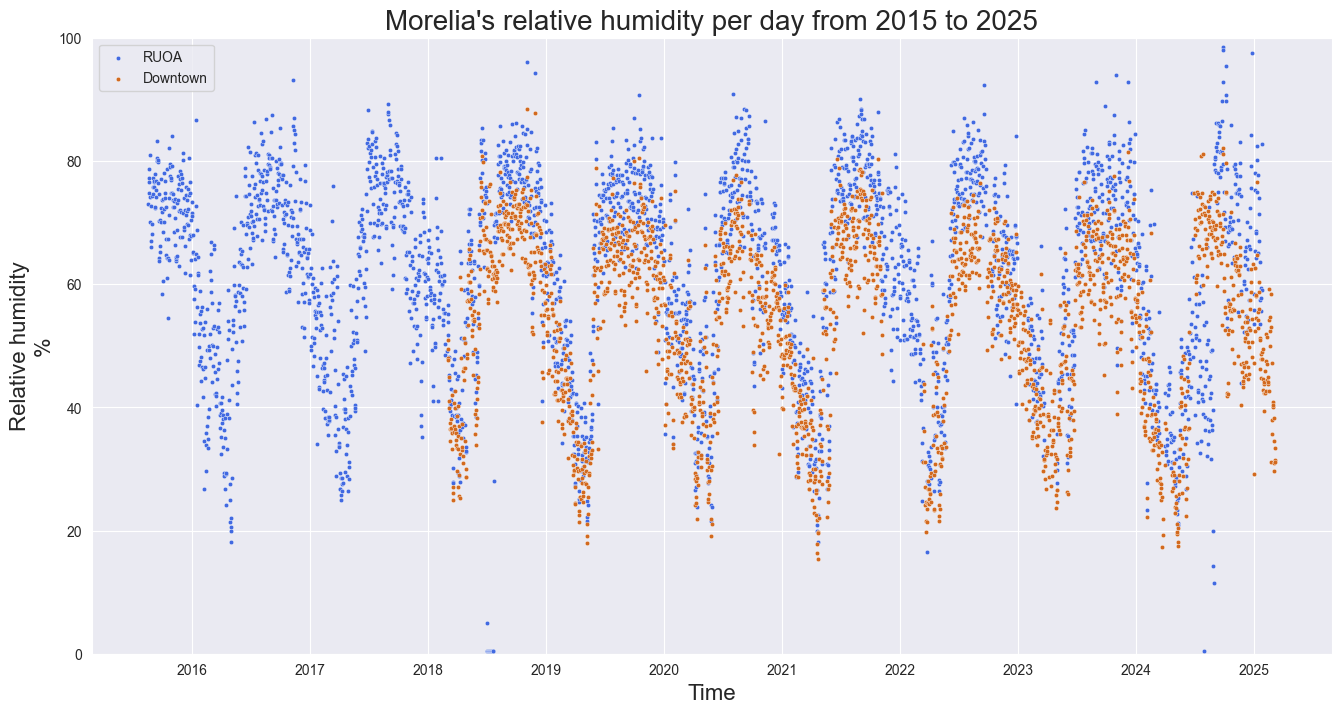

In [28]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["RH_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RelativeHumidityDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 100)
plt.ylabel("Relative humidity\n%", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's relative humidity per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Solar Radiation

In [29]:
df_merge["Rad_Avg"] = df_merge["Rad_Avg"].apply(radiation)
df_merge["SolarRadiationDowntown"] = df_merge["SolarRadiationDowntown"].apply(radiation)

In [30]:
df_merge[["Rad_Avg", "SolarRadiationDowntown"]].describe()

,Rad_Avg,SolarRadiationDowntown
count,3247.000000,2065.000000
mean,241.836719,339.884366
std,60.127395,134.604639
min,20.993886,0.083333
25%,205.839833,232.083333
50%,242.604656,306.625000
75%,285.502256,458.500000
max,555.670708,652.000000


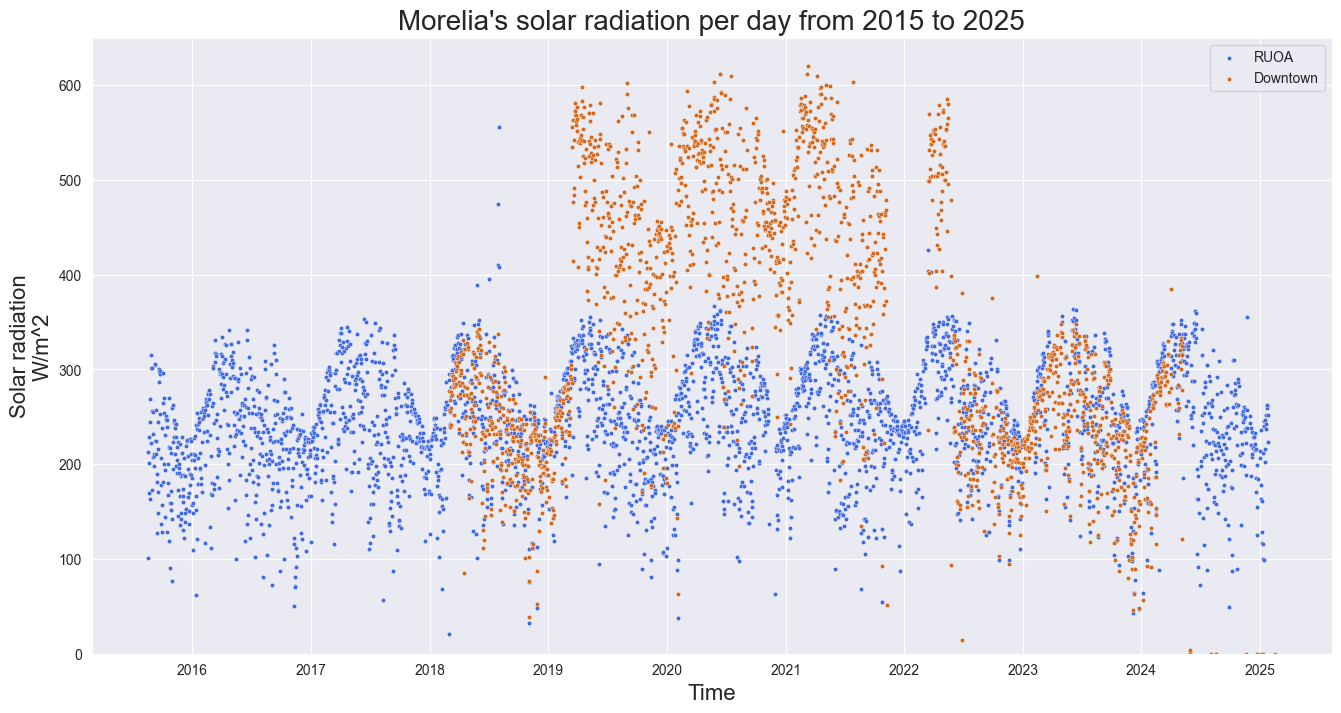

In [32]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rad_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["SolarRadiationDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 650)
plt.ylabel("Solar radiation\nW/m^2", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's solar radiation per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

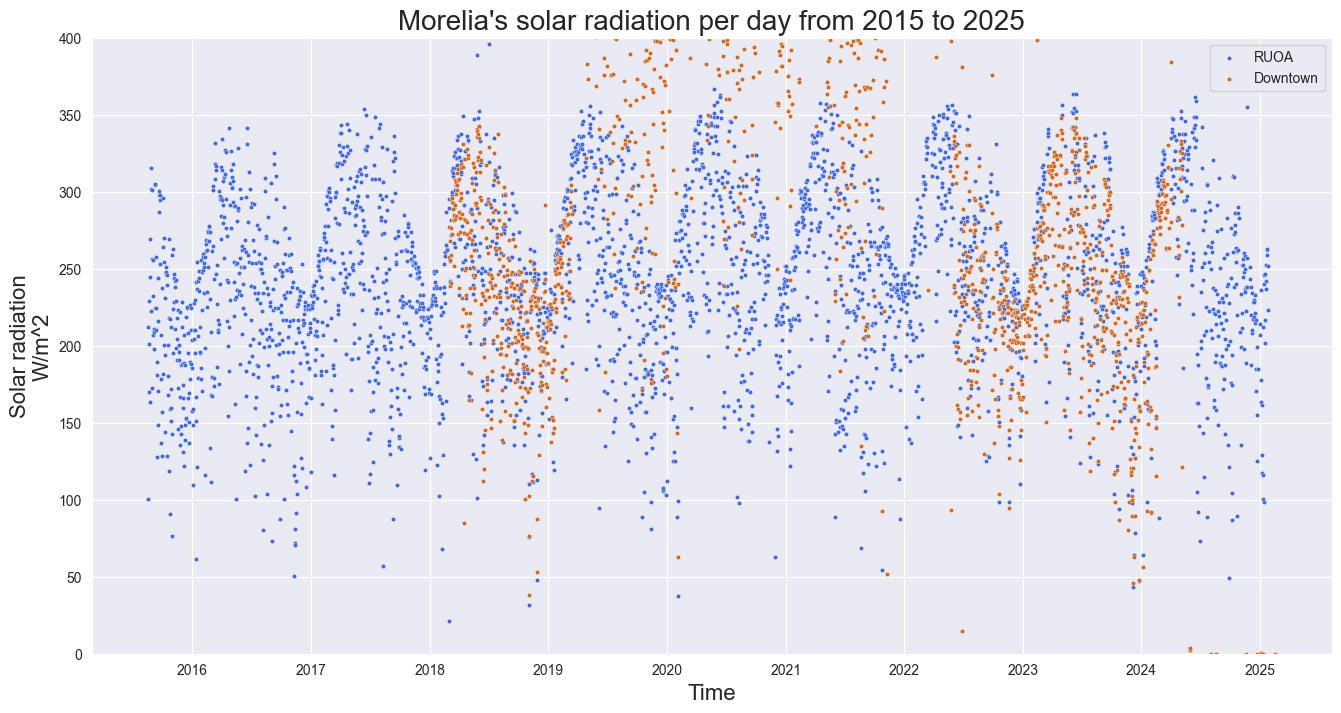

In [33]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rad_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["SolarRadiationDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 400)
plt.ylabel("Solar radiation\nW/m^2", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's solar radiation per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## PM10

In [35]:
df_merge["PM10"] = df_merge["PM10"].apply(pm)

In [36]:
df_merge["PM10Downtown"] = df_merge["PM10Downtown"].apply(pm)

In [37]:
df_merge[["PM10", "PM10Downtown"]].describe()

,PM10,PM10Downtown
count,2678.000000,2.000000
mean,23.132756,210.130952
std,11.394023,35.877251
min,4.044163,184.761905
25%,14.875719,197.446429
50%,21.191335,210.130952
75%,30.121172,222.815476
max,171.763035,235.500000


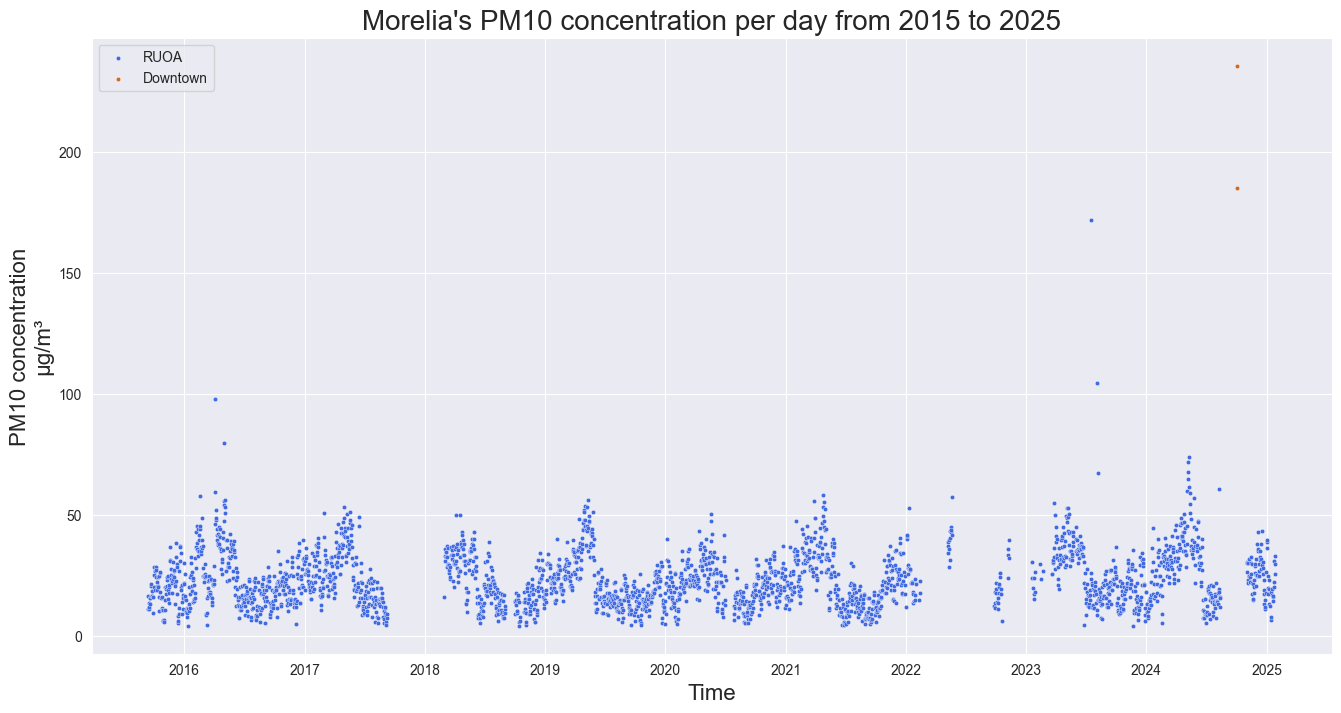

In [38]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM10"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM10Downtown"], s=10, color="chocolate", label="Downtown")
# plt.ylim(0, 400)
plt.ylabel("PM10 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM10 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

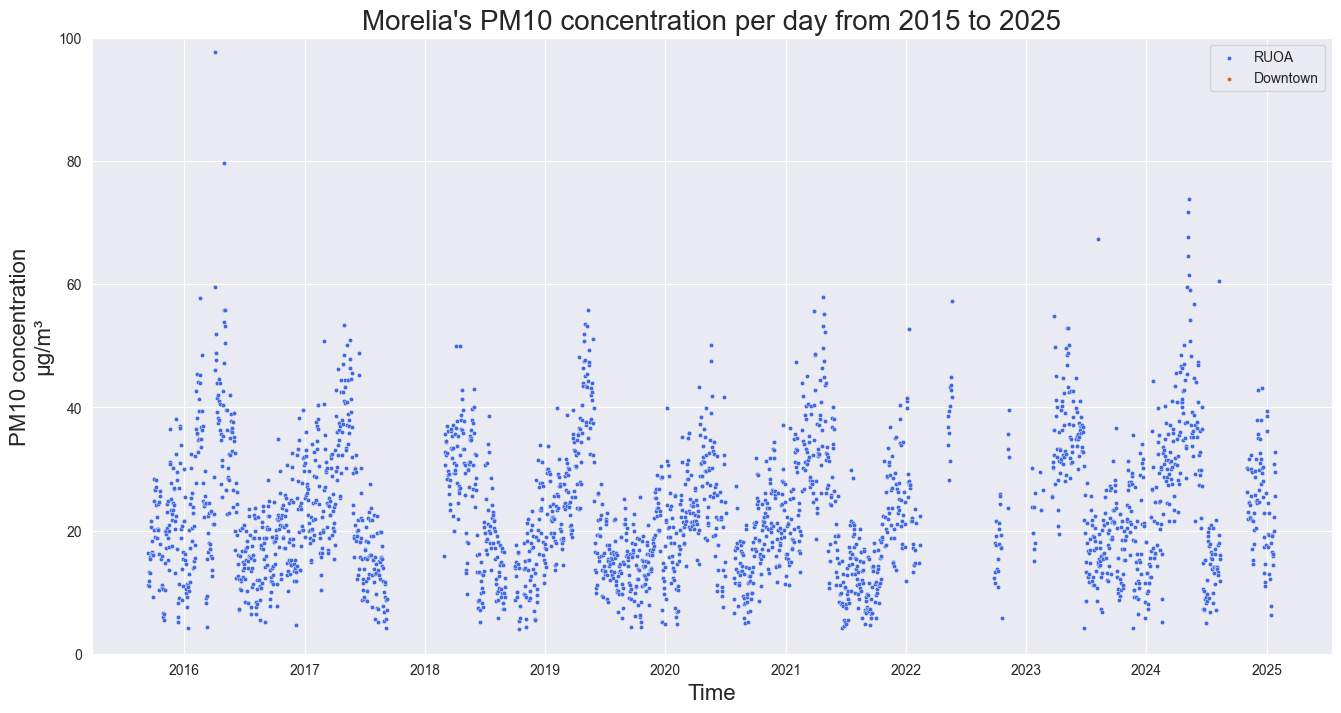

In [39]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM10"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM10Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 100)
plt.ylabel("PM10 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM10 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## PM2.5

In [41]:
df_merge["PM2.5"] = df_merge["PM2.5"].apply(pm)
df_merge["PM2.5Downtown"] = df_merge["PM2.5Downtown"].apply(pm)

In [43]:
df_merge[["PM2.5", "PM2.5Downtown"]].describe()

,PM2.5,PM2.5Downtown
count,1225.000000,1823.000000
mean,16.737019,26.752805
std,9.149690,34.716014
min,4.006514,4.478261
25%,10.425316,14.875000
50%,14.669229,19.916667
75%,21.273229,26.395833
max,80.472833,398.666667


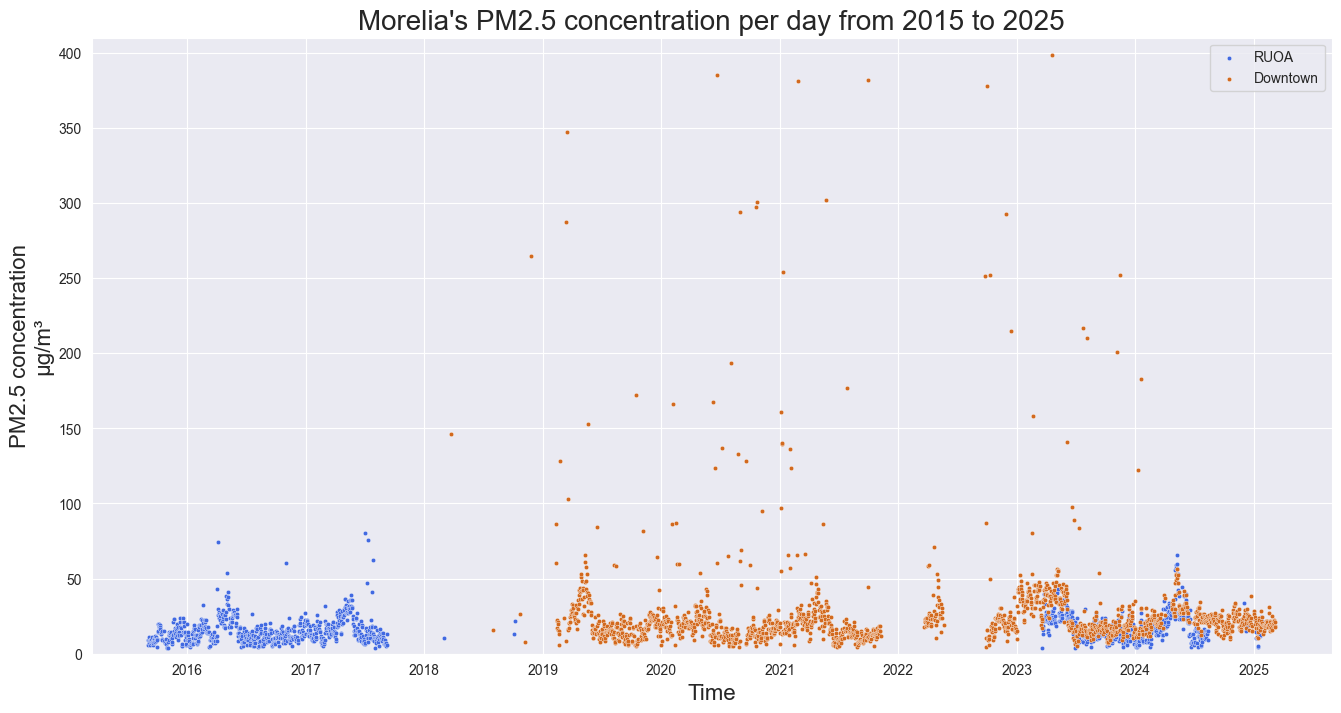

In [47]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM2.5"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM2.5Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 410)
plt.ylabel("PM2.5 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM2.5 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

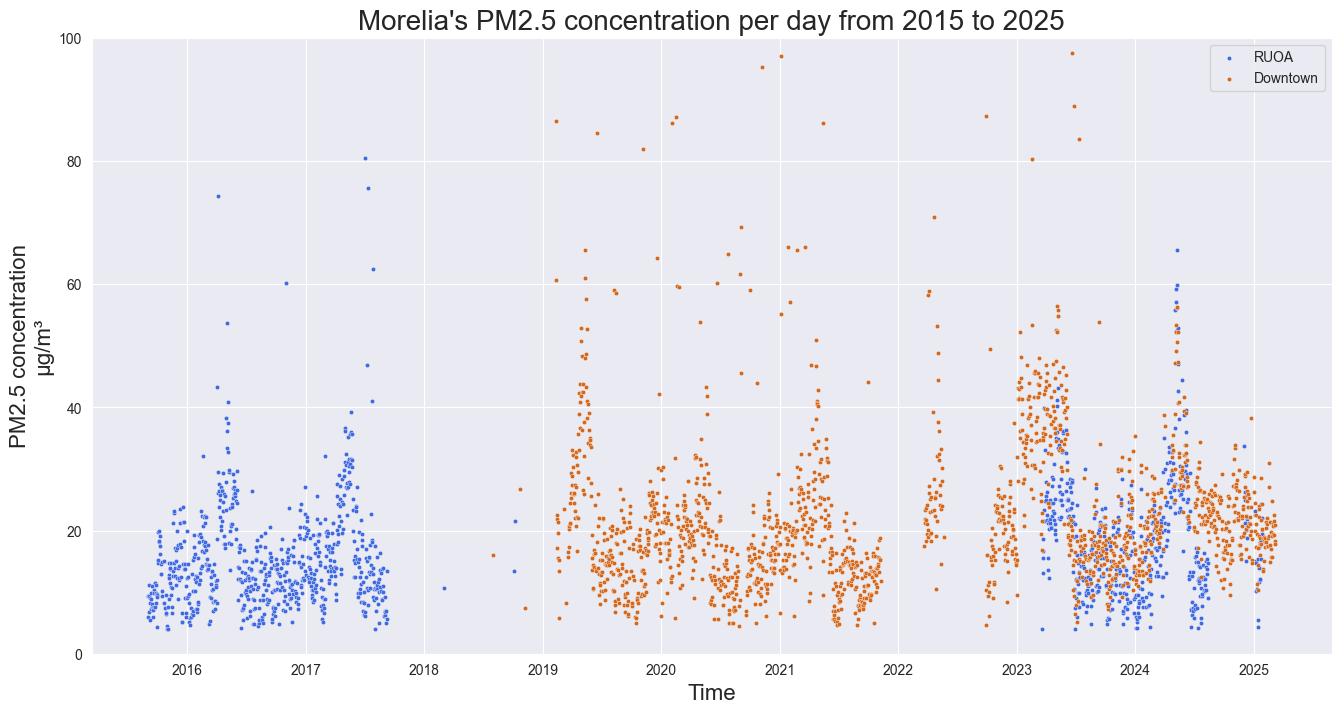

In [48]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM2.5"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["PM2.5Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 100)
plt.ylabel("PM2.5 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM2.5 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## CO

In [49]:
df_merge["CO"] = df_merge["CO"].apply(co)
df_merge["CODowntown"] = df_merge["CODowntown"].apply(co)

In [50]:
df_merge[["CO", "CODowntown"]].describe()

,CO,CODowntown
count,2841.000000,1274.000000
mean,0.385257,0.580937
std,0.239291,0.646359
min,0.044139,0.040000
25%,0.276379,0.284792
50%,0.331368,0.437292
75%,0.408847,0.694896
max,5.209854,8.640000


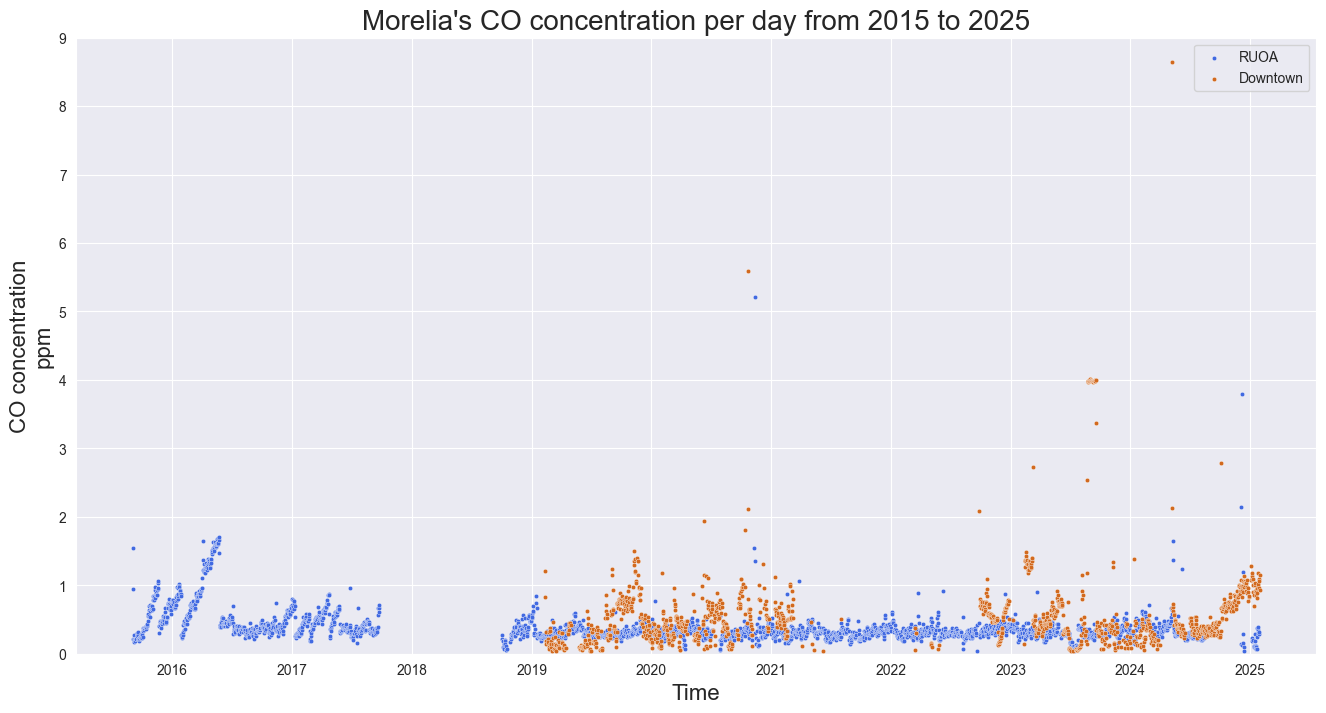

In [52]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["CO"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["CODowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 9)
plt.ylabel("CO concentration\nppm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's CO concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

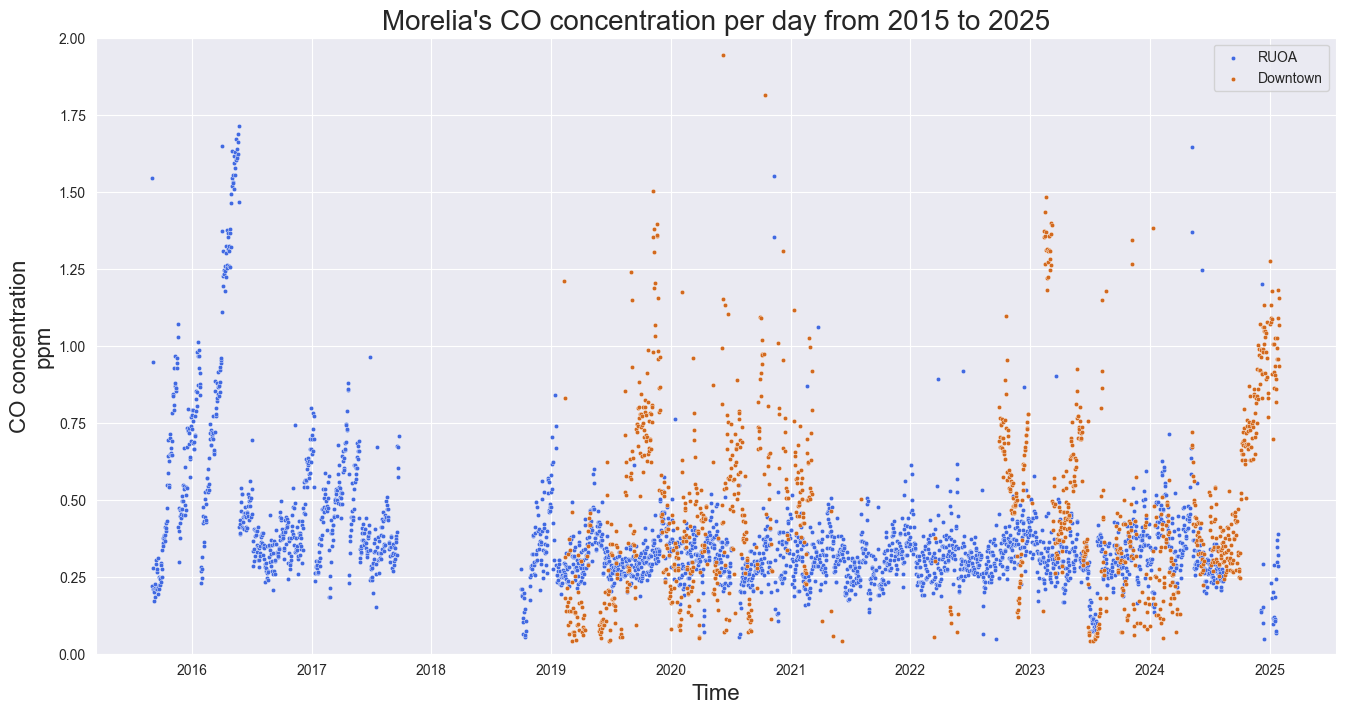

In [53]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["CO"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["CODowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 2)
plt.ylabel("CO concentration\nppm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's CO concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## O3

In [54]:
df_merge["O3"] = df_merge["O3"].apply(o3)
df_merge["O3Downtown"] = df_merge["O3Downtown"].apply(o3)

In [55]:
df_merge[["O3", "O3Downtown"]].describe()

,O3,O3Downtown
count,1892.000000,1519.000000
mean,33.621843,21.818788
std,10.929299,14.653507
min,7.261363,0.083333
25%,26.705450,9.062500
50%,32.960229,23.208333
75%,39.696266,32.480769
max,181.718000,133.750000


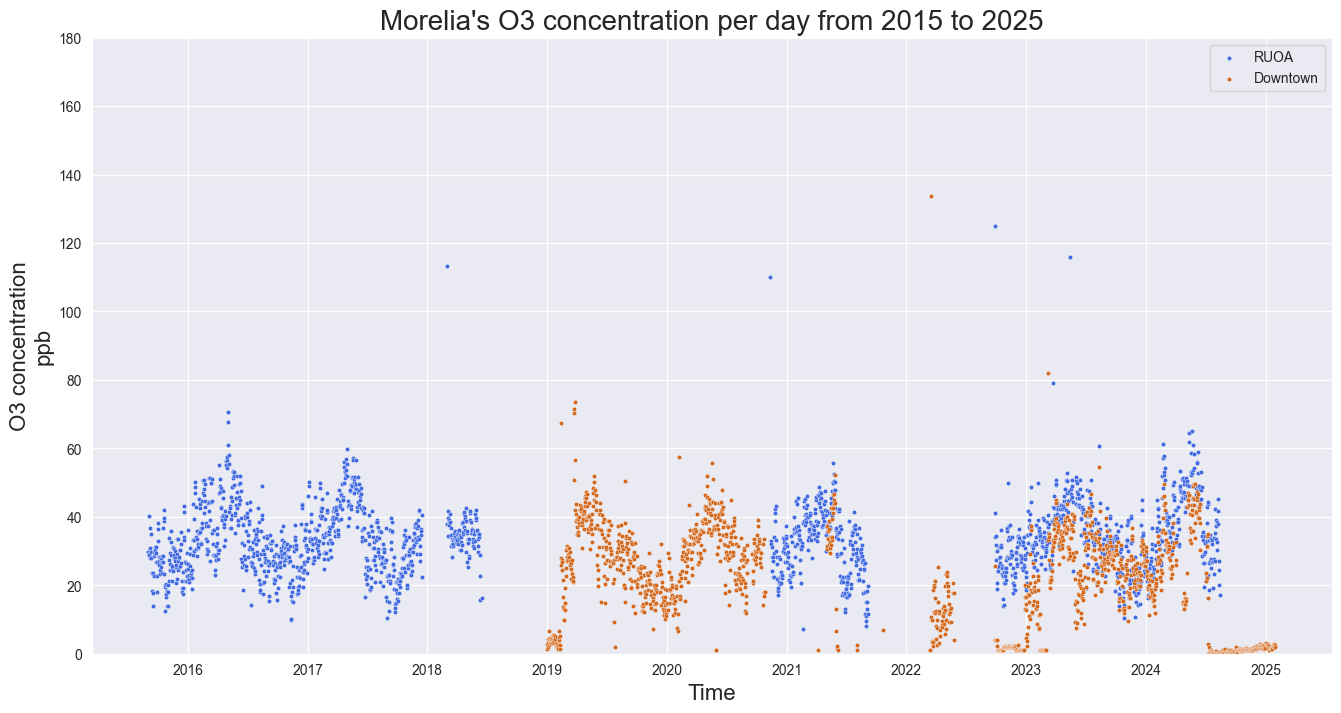

In [57]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["O3"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["O3Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 180)
plt.ylabel("O3 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's O3 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

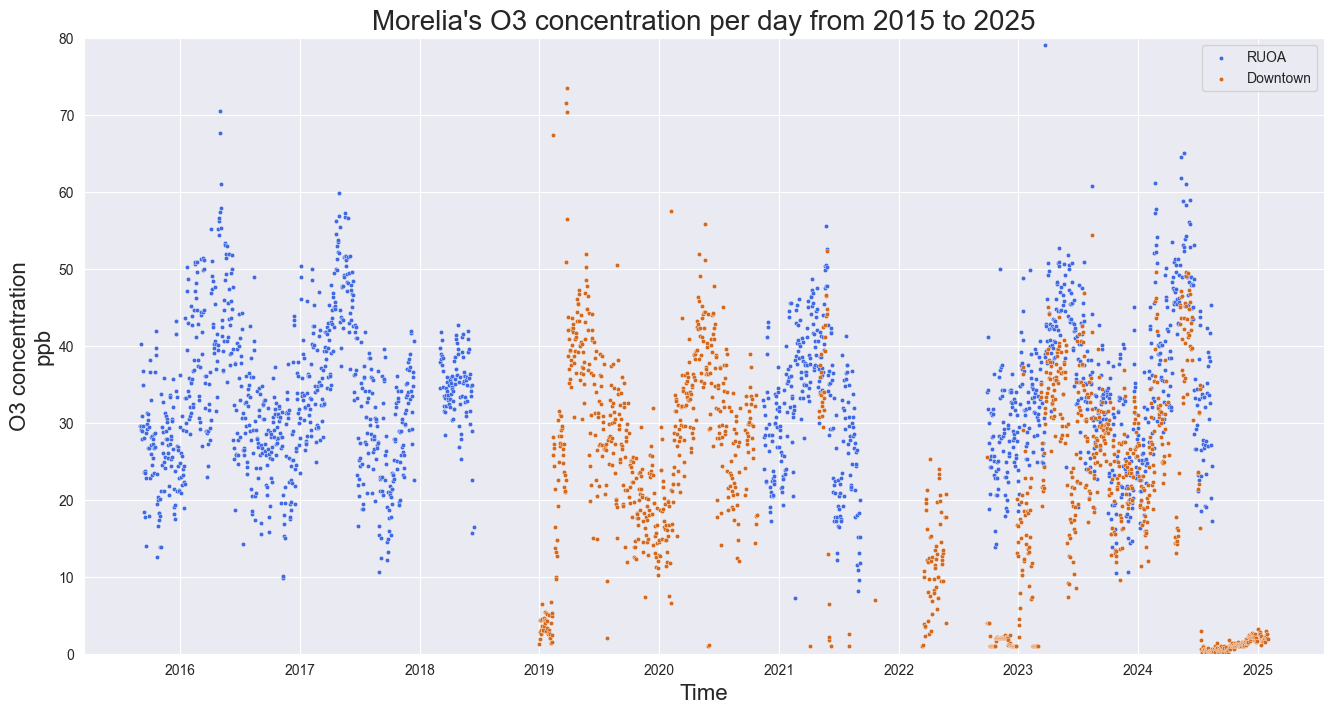

In [58]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["O3"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["O3Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 80)
plt.ylabel("O3 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's O3 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## NO2

In [59]:
df_merge["NO2"] = df_merge["NO2"].apply(no2)
df_merge["NO2Downtown"] = df_merge["NO2Downtown"].apply(no2)

In [60]:
df_merge[["NO2", "NO2Downtown"]].describe()

,NO2,NO2Downtown
count,1277.000000,671.000000
mean,4.848040,11.455839
std,10.871273,12.965455
min,0.412083,1.000000
25%,2.975687,6.062500
50%,4.206778,9.250000
75%,5.564451,11.916667
max,286.255278,142.187500


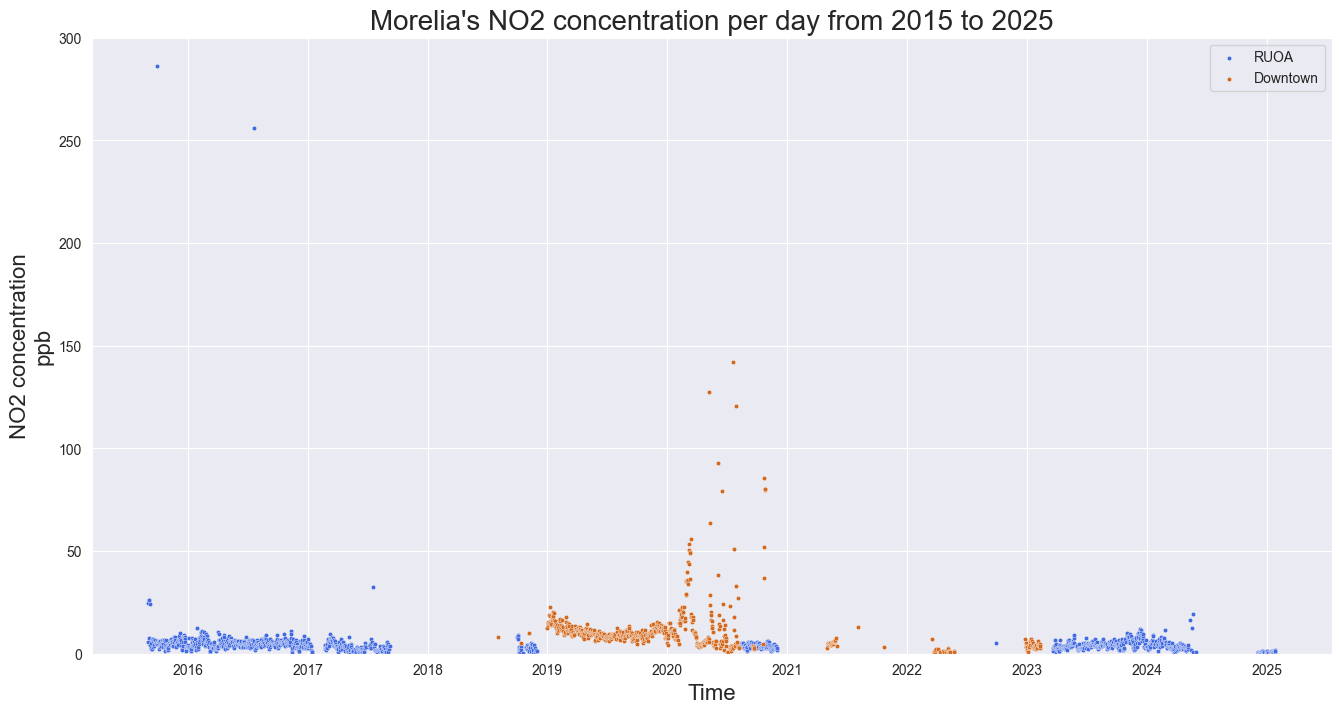

In [62]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO2"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO2Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 300)
plt.ylabel("NO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO2 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

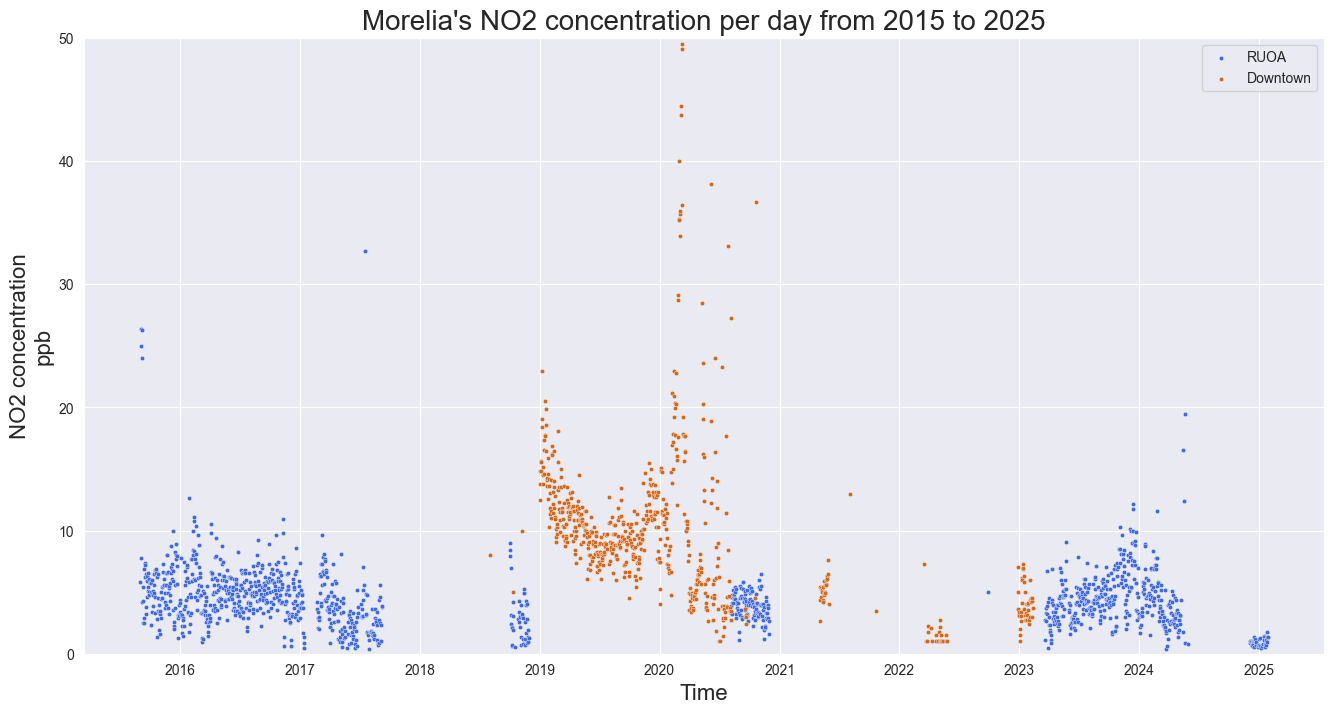

In [63]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO2"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO2Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 50)
plt.ylabel("NO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO2 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## NO

In [64]:
df_merge["NO"] = df_merge["NO"].apply(no)
df_merge["NODowntown"] = df_merge["NODowntown"].apply(no)

In [65]:
df_merge[["NO", "NODowntown"]].describe()

,NO,NODowntown
count,1038.000000,795.000000
mean,1.917204,8.021111
std,3.603363,9.986034
min,0.402403,1.000000
25%,0.635222,4.083333
50%,0.996483,6.916667
75%,1.914709,9.000000
max,67.113333,199.214286


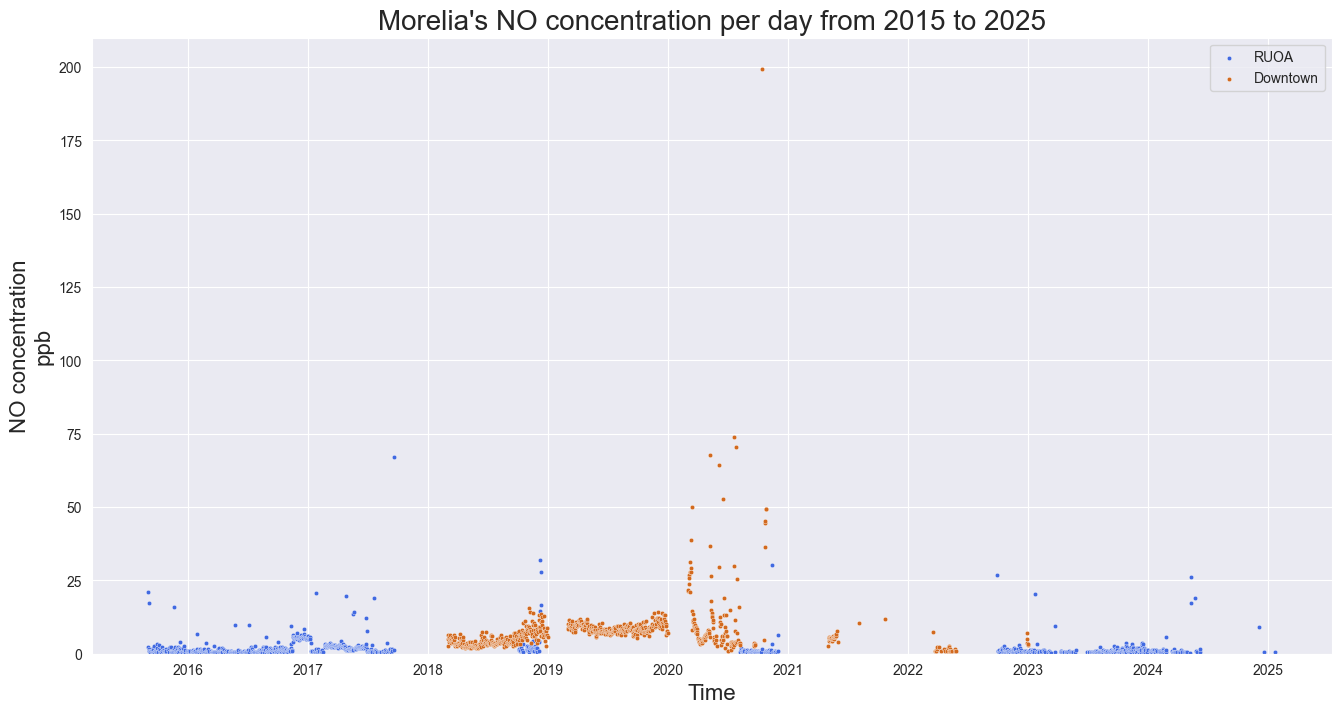

In [71]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["NODowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 210)
plt.ylabel("NO concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

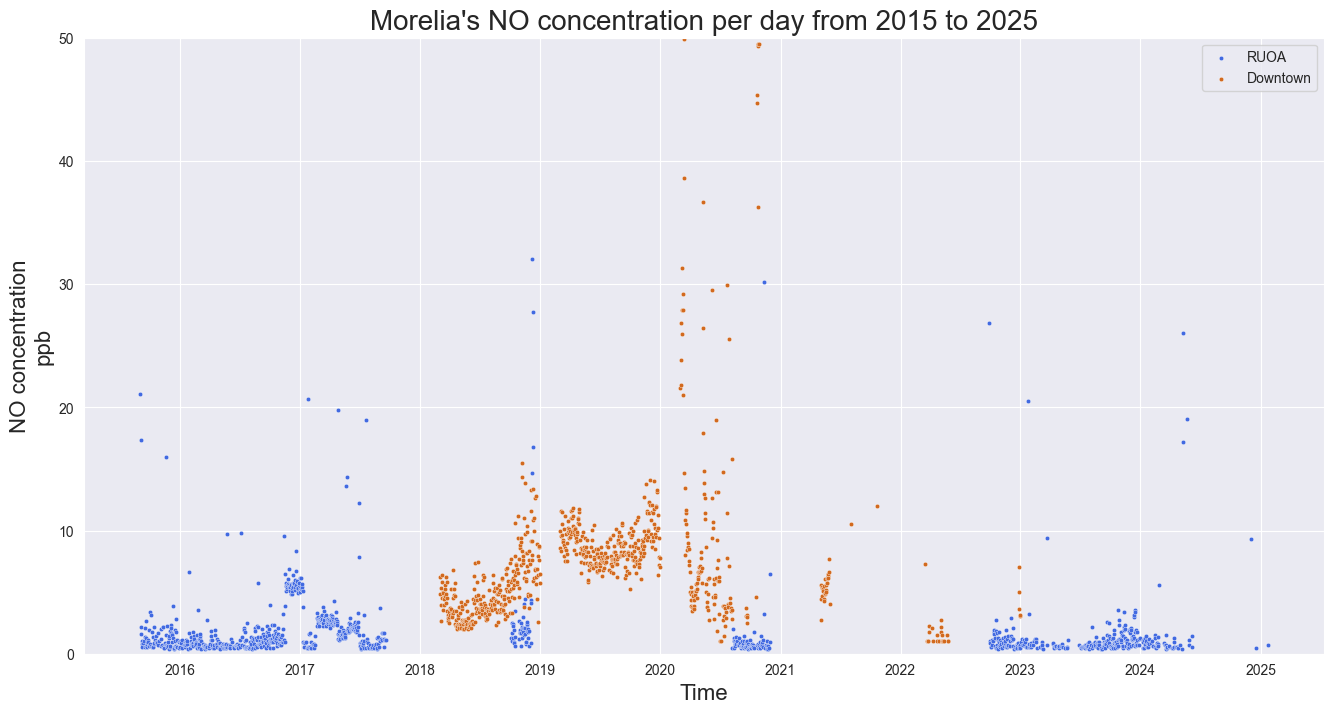

In [72]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["NO"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["NODowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 50)
plt.ylabel("NO concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's NO concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## SO2

In [73]:
df_merge["SO2"] = df_merge["SO2"].apply(so2)
df_merge["SO2Downtown"] = df_merge["SO2Downtown"].apply(so2)

In [74]:
df_merge[["SO2", "SO2Downtown"]].describe()

,SO2,SO2Downtown
count,1750.000000,79.000000
mean,1.333110,30.307889
std,2.709045,20.035567
min,0.501597,1.333333
25%,0.728788,6.000000
50%,0.944955,38.583333
75%,1.249159,41.416667
max,69.114637,71.666667


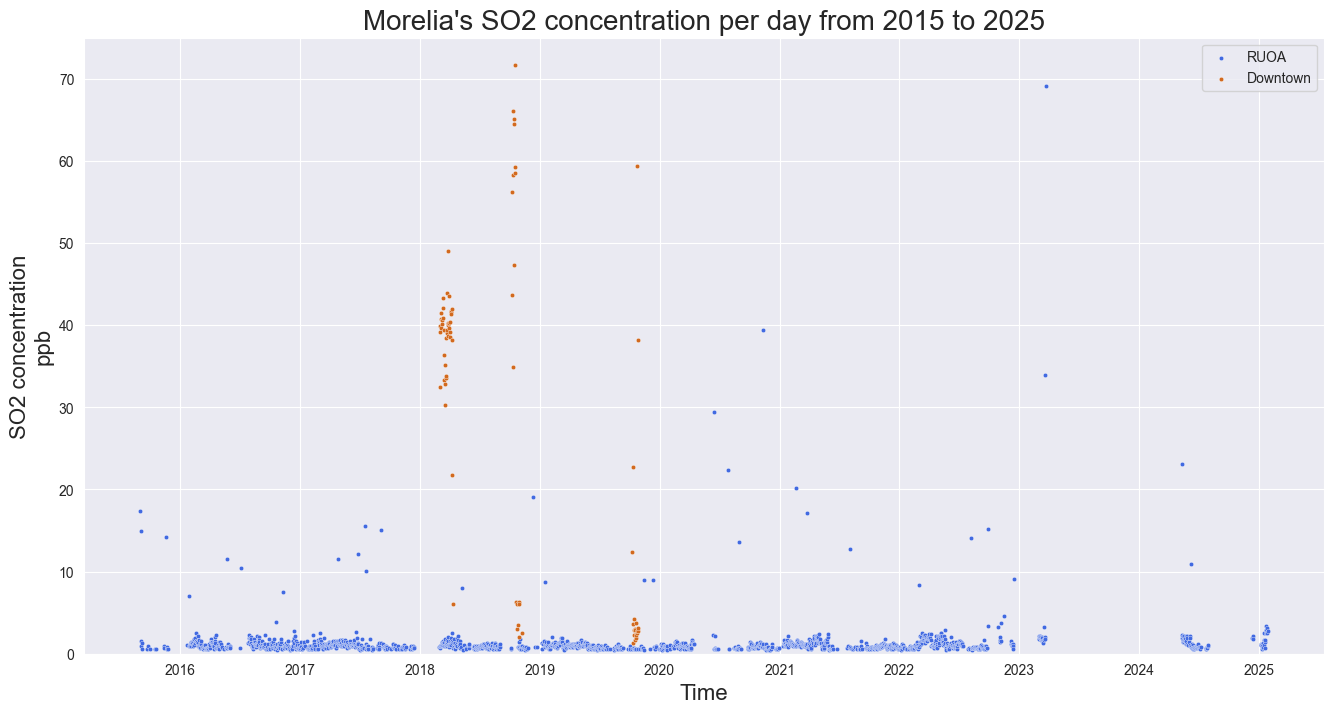

In [76]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["SO2"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["SO2Downtown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 75)
plt.ylabel("SO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's SO2 concentration per day from 2015 to 2025", size=20)
plt.legend()
plt.show()